In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [38]:
df = pd.read_csv('C:/Users/user/Documents/train.csv')

In [39]:
df.head()
len(df)

1458644

In [4]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#Data fields

<p>id - a unique identifier for each trip</p>
<p>vendor_id - a code indicating the provider associated with the trip record</p>
<p>pickup_datetime - date and time when the meter was engaged</p>
<p>dropoff_datetime - date and time when the meter was disengaged</p>
<p>passenger_count - the number of passengers in the vehicle (driver entered value)</p>
<p>pickup_longitude - the longitude where the meter was engaged</p>
<p>pickup_latitude - the latitude where the meter was engaged</p>
<p>dropoff_longitude - the longitude where the meter was disengaged</p>
<p>dropoff_latitude - the latitude where the meter was disengaged</p>
<p>store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor  because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip</p>
<p>trip_duration - duration of the trip in seconds</p>

In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD56C18>]], dtype=object)

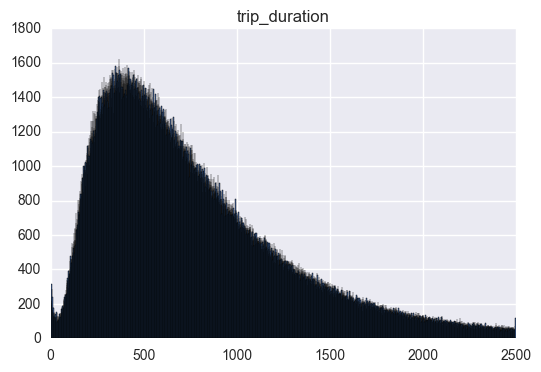

In [6]:
df.hist('trip_duration', bins=[i for i in range(2500)])

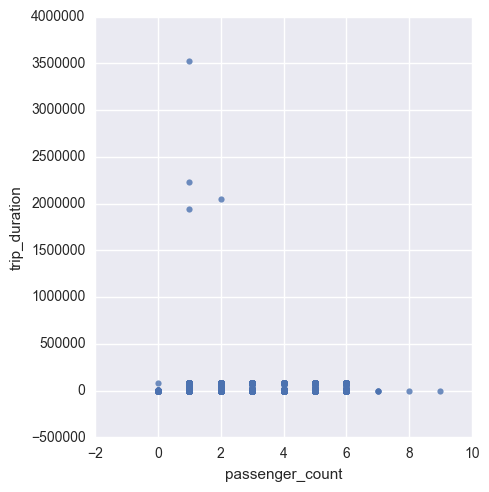

In [7]:
sns.lmplot(x="passenger_count", y="trip_duration", data=df, fit_reg=False)

We need to find a way to drop the records which have trip duration greater than 500 000 seconds. Probably they are measurement errors.

In [18]:
extrem_trip_duration_list = [i for i in range(len(df['trip_duration'])) if df['trip_duration'][i] > 500000]

In [19]:
extrem_trip_duration_list #the index values for extrem trip durations greater than 500000 seconds

[355003, 680594, 924150, 978383]

In [23]:
# we will drop these indexes from the dataframe

In [21]:
df.drop(df.index[[355003, 680594, 924150, 978383]], inplace=True)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


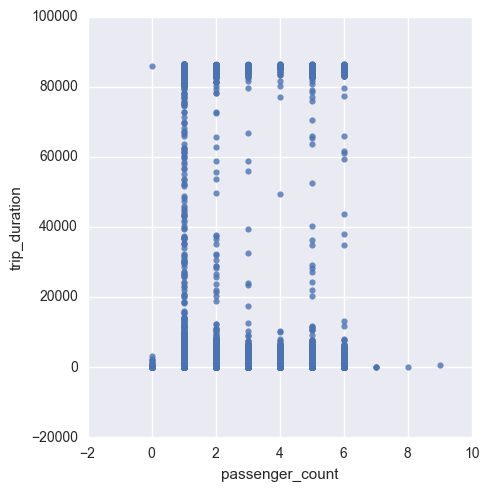

In [22]:
sns.lmplot(x="passenger_count", y="trip_duration", data=df, fit_reg=False)

In [24]:
# the new plot looks much nicer. we got rid of those extreme 4 records.

In [8]:
NYT_passanger_mode = df['passenger_count'].value_counts()
NYT_passanger_mode

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

We have total 5 trips with number of passangers greater than 6. We can delete them. We can also delete the zero passanger with 60 records. We should analyze the trips with 1,2,3,4,5,6 passangers. By far, the mode is 1 passanger only. Lets do a histogram of it:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C3279B0>]], dtype=object)

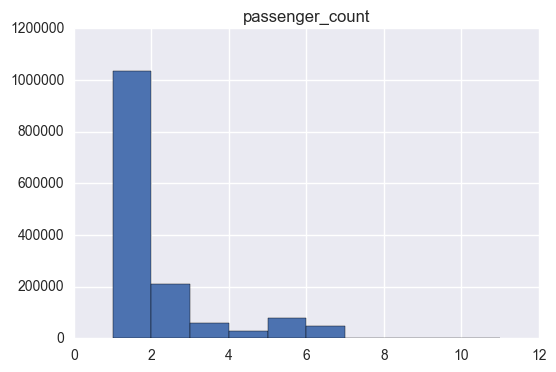

In [9]:
df.hist('passenger_count', bins=[i for i in range(12)])

In [10]:
df.corr( method='pearson')

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


In [11]:
# As expected, there is no correlation or whatsoever between these variables (other than dropoff and pickup longitudes :D )

In [12]:
# Lets find the outliers. There should be more outliers. Later we will figure out what to do with them.

In [11]:
from scipy.stats import iqr

trip_duration_iqr = iqr(df['trip_duration']) #inter quantile range
median_duration = df['trip_duration'].median() #median value

trip_duration_q1 = median_duration - trip_duration_iqr #first quartile
trip_duration_q3 = median_duration + trip_duration_iqr #third quartile
 
duration_outliers = sum(df['trip_duration'] < trip_duration_q1 - 1.5*trip_duration_iqr)   #1.5 times from q1 and q3
duration_outliers = duration_outliers + sum(df['trip_duration'] > trip_duration_q3 + 1.5*trip_duration_iqr)

In [12]:
duration_outliers

52237

In [17]:
# We have 52237 outliers for trip durations. it makes around 3% of the total data.

records to delete: 1) trip_duration outliers 2) Passenger Count greater than 6 or equal to 0.

In [28]:
# outliers to delete. we need a list of indexes from them.
outlier_index_list = []
for i in range(len(df['trip_duration'])):
    if df['trip_duration'][i] > trip_duration_q3 + 1.5*trip_duration_iqr or df['passenger_count'][i] > 6 or df['passenger_count'][i] == 0:
        outlier_index_list.append(i)

In [30]:
len(outlier_index_list)

52300

In [29]:
outlier_index_list[:5]

[24, 55, 57, 98, 111]

In [31]:
df.drop(df.index[[i for i in outlier_index_list]], inplace=True)

In [37]:
after = len(df)
after

1406344

In [33]:
df.iloc[111]

id                              id0935429
vendor_id                               1
pickup_datetime       2016-05-02 06:58:06
dropoff_datetime      2016-05-02 07:08:17
passenger_count                         1
pickup_longitude                 -73.9991
pickup_latitude                   40.7455
dropoff_longitude                -73.9786
dropoff_latitude                  40.7623
store_and_fwd_flag                      N
trip_duration                         611
Name: 116, dtype: object

In [35]:
df['trip_duration'].median()

641.0

In [40]:
1458644 - 1406344

52300

In [43]:
sum(pd.isnull(df['trip_duration']))

0

In [44]:
sum(pd.isnull(df['passenger_count']))

0

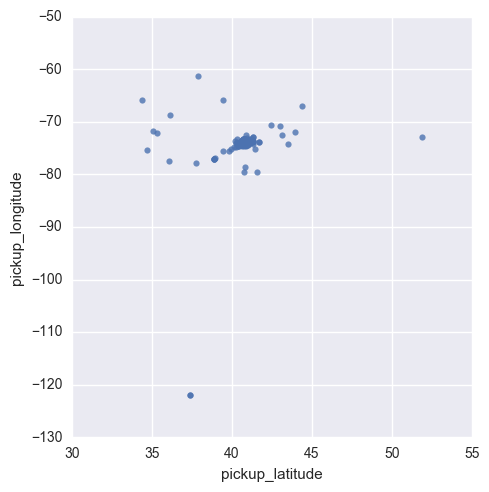

In [48]:
sns.lmplot('pickup_latitude', 'pickup_longitude', data=df, fit_reg=False)